In [1]:
# Standard Imports
import numpy as np
from time import time
import pandas as pd
from matplotlib import pyplot as plt

# SHAPER
from src.Observables import Observable
from src.Shaper import Shaper
from src.Manifolds import Coordinates2D, Simplex, PositiveReals, Circle

# Utils
from utils.data_utils import load_cmsopendata, load_dataset, calculate_masses, normalize_events, add_pileup
from utils.plot_utils import plot_event
from ot.lp import emd2

# Jets
from pyjet import cluster



# GPU nonsense
import torch 
import torch.nn as nn

if torch.cuda.is_available():  
    dev = "cuda:0" 
    print("Using GPU!")
else:  
    dev = "cpu"  
    print("Using CPU!")
device = torch.device(dev) 



/home/rikab/miniconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Using CPU!


In [ ]:
# Standard Imports
import numpy as np
from time import time
import pandas as pd
from matplotlib import pyplot as plt

# SHAPER
from src.Observables import Observable
from src.Shaper import Shaper
from src.Manifolds import Coordinates2D, Simplex, PositiveReals, Circle

# Utils
from utils.data_utils import load_cmsopendata, load_dataset, calculate_masses, normalize_events, add_pileup
from utils.plot_utils import plot_event
from ot.lp import emd2

# Jets
from pyjet import cluster



# GPU nonsense
import torch 
import torch.nn as nn

if torch.cuda.is_available():  
    dev = "cuda:0" 
    print("Using GPU!")
else:  
    dev = "cpu"  
    print("Using CPU!")
device = torch.device(dev) 



/home/rikab/miniconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Using CPU!


In [ ]:
# Standard Imports
import numpy as np
from time import time
import pandas as pd
from matplotlib import pyplot as plt

# SHAPER
from src.Observables import Observable
from src.Shaper import Shaper
from src.Manifolds import Coordinates2D, Simplex, PositiveReals, Circle

# Utils
from utils.data_utils import load_cmsopendata, load_dataset, calculate_masses, normalize_events, add_pileup
from utils.plot_utils import plot_event
from ot.lp import emd2

# Jets
from pyjet import cluster



# GPU nonsense
import torch 
import torch.nn as nn

if torch.cuda.is_available():  
    dev = "cuda:0" 
    print("Using GPU!")
else:  
    dev = "cpu"  
    print("Using CPU!")
device = torch.device(dev) 



/home/rikab/miniconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Using CPU!


# Data

(300, 200, 3)
(300, 200, 3)
652.7005


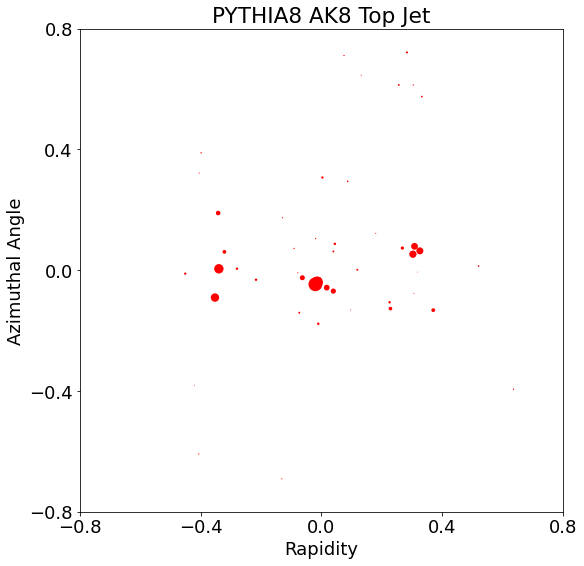

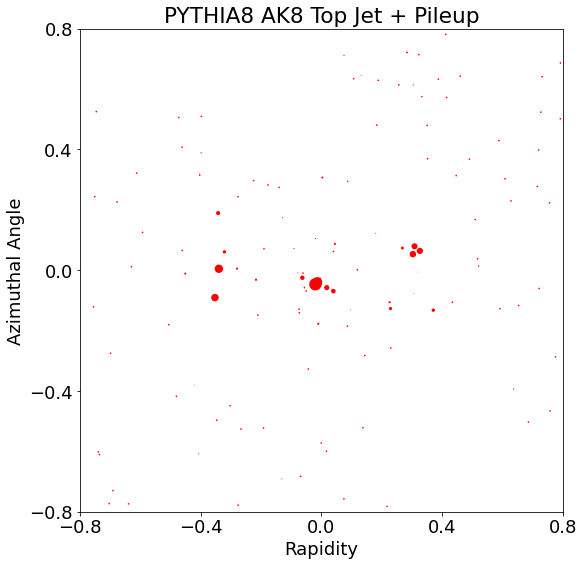

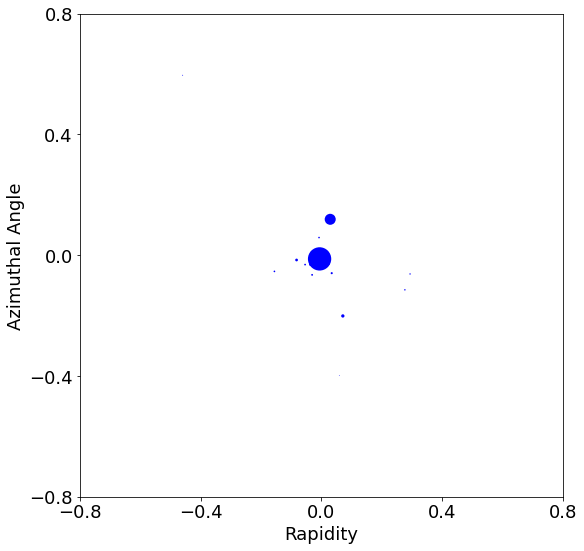

163.98135626462013 5.293781232504222
279.76897209143425 38.60607048115842


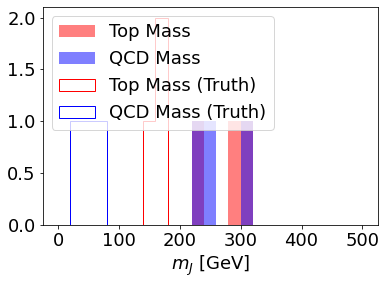

Parameter containing:
tensor([-0.4749, -0.4749, -0.4749], requires_grad=True)


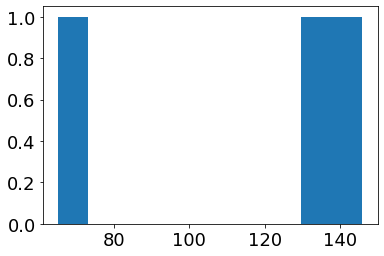

In [2]:
# Parameters
R = 0.8
beta = 1
N = 3
batch_size = 500

mass_lower = 0
mass_upper = np.inf
pt_lower = 475
pt_upper = 525
eta = 1.9
quality = 2
pad = 125
plot_dir = "results"


# Load events
signal = load_dataset("../Datasets/top/v0/signal_train.npy", N, mass_lower, mass_upper, eta, normalize = False)
background = load_dataset("../Datasets/top/v0/background_train.npy", N, mass_lower, mass_upper, eta, normalize = False)
signal_mass = calculate_masses(signal)
background_mass = calculate_masses(background)




# Add pileup
signal_pu, signal_norms1 = normalize_events(add_pileup(signal, 100, 50, 250, .25, R), return_norm= True)
background_pu, background_norms = normalize_events(add_pileup(background, 100, 50, 250, .25, R), return_norm= True)
signal_pu_mass = signal_norms1 * calculate_masses(signal_pu)
background_pu_mass = background_norms * calculate_masses(background_pu)



events = [signal, background]
event_labels = ["signal", "background"]
colors = ["red", "blue"]




# Example plots
example_signal = signal[0]
example_signal_pu = signal_pu[0]
print(example_signal[1].sum())
plot_event(example_signal[0], example_signal[1], R, color = "red", title = "PYTHIA8 AK8 Top Jet", filename= "Plots/top.pdf")
plot_event(example_signal_pu[0], example_signal_pu[1], R, color = "red", title = "PYTHIA8 AK8 Top Jet + Pileup", filename = "Plots/top_pileup.pdf")

example_background = background[0]
plot_event(example_background[0], example_background[1], R, color = "blue")

print(np.mean(signal_mass), np.std(signal_mass))
print(np.mean(signal_pu_mass), np.std(signal_pu_mass))


plt.hist(signal_pu_mass, color = "red", bins = 25, range = [0, 500], label = "Top Mass", alpha = 0.5, histtype="stepfilled")
plt.hist(background_pu_mass, color = "blue", bins = 25, range = [0, 500], label = "QCD Mass", alpha = 0.5, histtype="stepfilled")
plt.hist(signal_mass, color = "red", bins = 25, range = [0, 500], label = "Top Mass (Truth)", alpha = 1.0, histtype="step")
plt.hist(background_mass, color = "blue", bins = 25, range = [0, 500], label = "QCD Mass (Truth)", alpha = 1.0, histtype="step")
plt.legend(loc = "upper left")
plt.xlabel(r"$m_J$ [GeV]")
plt.show()


plt.hist(signal_pu_mass - signal_mass)


# Circle
circle = Circle(3, initializer = 8)
circle.enforce()
print(circle.params)



In [3]:
from matplotlib.patches import Circle as pltCircle
from matplotlib.collections import PathCollection


# Sample at N weighted Dirac deltas
def point_sampler(N, param_dict):
    return (param_dict["Points"].params, param_dict["Weights"].params)

def point_plotter(ax, param_dict):

    centers = param_dict["Points"].params.clone().detach().numpy()
    weights = param_dict["Weights"].params.clone().detach().numpy()
    num = param_dict["Points"].N

    for i in range(num):

        # Center
        ax.scatter(centers[i,0], centers[i,1], color = "Purple", label = "Disk", marker = "x", s = 2 * weights[i] * 500/np.sum(weights), alpha = 0.5)
        
        # Text
        plt.text(0.05, 0.06 + 0.03*i, "Point: (%.3f, %.3f), Weight: %.3f" % (centers[i,0], centers[i,1], weights[i]), fontsize = 10, transform = plt.gca().transAxes)



# Disk
def disk_sampler(N, param_dict):

    centers = param_dict["Points"].params
    num = param_dict["Points"].N
    radii = param_dict["Radius"].params
    weights = param_dict["Structure Weights"].params

    phi = 2 * np.pi * torch.rand(num, N)
    r =  torch.sqrt(torch.rand(num, N))
    points = torch.stack([torch.cos(phi), torch.sin(phi)], axis = 1) * radii[:,None, None]  * r[:,None,:] + centers[:,:,None]


    # Concatenate and reweight
    e = points.reshape((-1, 2))
    z = torch.cat([weights[i] * torch.ones((N,)) / N for i in range(num)], dim = 0)
    return (e, z)


def disk_plotter(ax, param_dict):

    centers = param_dict["Points"].params.clone().detach().numpy()
    radii = param_dict["Radius"].params.clone().detach().numpy()
    weights = param_dict["Structure Weights"].params.clone().detach().numpy()
    num = param_dict["Points"].N

    for i in range(num):
        # Circle
        draw_circle = pltCircle(centers[i,:], radii[i], facecolor = "purple", edgecolor = "purple", alpha = 0.25)
        ax.add_artist(draw_circle)
  
        # Text
        plt.text(0.05, 0.06 + 0.03*i, "Point: (%.3f, %.3f), Weight: %.3f, Radius: %.3f" % (centers[i,0], centers[i,1], weights[i], radii[i]), fontsize = 10, transform = plt.gca().transAxes)


# Point plus disk
def point_disk_sampler(N, param_dict):

    centers = param_dict["Points"].params
    num = param_dict["Points"].N
    radii = param_dict["Radius"].params
    weights = param_dict["Structure Weights"].params

    phi = 2 * np.pi * torch.rand(num, N)
    r =  torch.sqrt(torch.rand(num, N))
    points = torch.stack([torch.cos(phi), torch.sin(phi)], axis = 1) * radii[:,None, None]  * r[:,None,:] + centers[:,:,None]


    # Concatenate and reweight
    e = torch.cat([centers, points.reshape((-1, 2))], dim = 0)
    z1 = torch.cat([weights[i] * torch.ones((1,)) for i in range(num)], dim = 0)
    z2 = torch.cat([weights[num + i] * torch.ones((N,)) / N for i in range(num)], dim = 0)
    z = torch.cat([z1, z2], dim = 0)
    return (e, z)


def point_disk_plotter(ax, param_dict):

    centers = param_dict["Points"].params.clone().detach().numpy()
    radii = param_dict["Radius"].params.clone().detach().numpy()
    weights = param_dict["Structure Weights"].params.clone().detach().numpy()
    num = param_dict["Points"].N

    for i in range(num):
        # Circle
        draw_circle = pltCircle(centers[i,:], radii[i], facecolor = "purple", edgecolor = "purple", alpha = 0.25)
        ax.add_artist(draw_circle)

        # Center
        ax.scatter(centers[i,0], centers[i,1], color = "Purple", label = "Disk", marker = "x", s = 2 * weights[i] * 500/np.sum(weights), alpha = 0.5)
        
        # Text
        plt.text(0.05, 0.06 + 0.03*i, "Point: (%.3f, %.3f), Weight: %.3f, Radius: %.3f" % (centers[i,0], centers[i,1], weights[0], radii[i]), fontsize = 10, transform = plt.gca().transAxes)


# Sample from a normalized uniform distribution
def uniform_sampler(N, param_dict):
    points = torch.FloatTensor(N, 2).uniform_(-R, R)
    zs = torch.ones((N,)) / N
    return (points, zs)




n = 3
_3subjettiness = Observable({"Points" : Coordinates2D(n), "Weights" : Simplex(n)}, point_sampler, beta = 1, R = R, initializer= "kt", plotter = point_plotter)
_3diskiness = Observable({"Points" : Coordinates2D(n), "Structure Weights" : Simplex(n), "Radius" : PositiveReals(n, R/2)}, disk_sampler, beta = 1, R = R, initializer= "kt", plotter = disk_plotter)
_3point_diskiness = Observable({"Points" : Coordinates2D(n), "Structure Weights" : Simplex(2*n), "Radius" : PositiveReals(n, R/2)}, point_disk_sampler, beta = 1, R = R, initializer= "kt", plotter = point_disk_plotter)

_isotropy = Observable({}, uniform_sampler, beta = 1, R = 0.8)
_3subjettiness_plus_pileup = (_3subjettiness + _isotropy)
_3diskiness_plus_pileup = (_3diskiness  + _isotropy)
_3point_diskiness_plus_pileup = (_3point_diskiness + _isotropy)

plot_dictionary = {
    "plot_directory" : "Plots/Test",
    "gif_directory" : "Plots/gifs",  
    "extension" : "png",
}


observables = {
    "3-Subjettiness" : _3subjettiness,
    # "3-Diskiness" : _3diskiness,
    "3-Point-Diskiness" : _3point_diskiness,
    "3-Subjettiness Plus Pileup" : _3subjettiness_plus_pileup,
    # "3-Diskiness Plus Pileup" : _3diskiness_plus_pileup,
    "3-Point-Diskiness Plus Pileup" : _3point_diskiness_plus_pileup,
}

shaper = Shaper(observables, device)

batch_size = min(batch_size, N)
batches = int(N / batch_size)


for batch in range(batches):

    print("BATCH: %d" % batch)
    start = batch * batch_size
    end = (batch + 1) * batch_size

    cms_emds, cms_params = shaper.calculate(signal_pu[start:end], epochs = 500, verbose=True, lr = 0.01, N = 50, scaling = 0.9, epsilon = 0.005, early_stopping= 25, plot_dictionary=None)
    np.save('test', cms_params)

BATCH: 0
Observable: 3-Subjettiness Epoch 0 Mean Loss = 0.18346709509690604 Elapsed time = 0.085s Percentage done = 0.000 
Observable: 3-Subjettiness Epoch 1 Mean Loss = 0.1774548888206482 Elapsed time = 0.220s Percentage done = 0.000 
Observable: 3-Subjettiness Epoch 2 Mean Loss = 0.1724731425444285 Elapsed time = 0.311s Percentage done = 0.000 
Observable: 3-Subjettiness Epoch 3 Mean Loss = 0.16821332275867462 Elapsed time = 0.399s Percentage done = 0.000 
Observable: 3-Subjettiness Epoch 4 Mean Loss = 0.16451417903105417 Elapsed time = 0.477s Percentage done = 0.000 
Observable: 3-Subjettiness Epoch 5 Mean Loss = 0.16104963918526968 Elapsed time = 0.561s Percentage done = 0.000 
Observable: 3-Subjettiness Epoch 6 Mean Loss = 0.15823056797186533 Elapsed time = 0.645s Percentage done = 0.000 
Observable: 3-Subjettiness Epoch 7 Mean Loss = 0.1562153920531273 Elapsed time = 0.718s Percentage done = 0.000 
Observable: 3-Subjettiness Epoch 8 Mean Loss = 0.15586750706036887 Elapsed time = 

In [4]:
pa = np.load('test.npy', allow_pickle = True)[()]
print(pa["3-Subjettiness"][0])

{'Points': array([[-0.02014682, -0.04766558],
       [ 0.3056229 ,  0.05847054],
       [-0.34394285,  0.00347503]], dtype=float32), 'Weights': array([0.46453157, 0.29571798, 0.23975049], dtype=float32)}


In [5]:
# params1 = np.load('data2/batch_0.npy', allow_pickle = True)[()]
# params2 = np.load('data2/batch_1.npy', allow_pickle = True)[()]

# mass_dict = {}
# pileup_dict = {}


# def masses_load(pa):
#     for obs in observables:

#         zs = []
#         events = []
#         event_parameters =  pa[obs]
#         pileup_factor = np.zeros((N,))

#         # Subtract pileup
#         is_pileup_corrected = "Plus Pileup" in obs
#         if is_pileup_corrected:
#             corrected_obs = obs[:-12]
#         else:
#             corrected_obs = obs

#         for i in range(N):
#             param_dict = event_parameters[i]
#             e, z = observables[corrected_obs].sampler(250, param_dict)
#             events.append((e.detach().numpy(), z.detach().numpy()))
#             if is_pileup_corrected:
#                 pileup_factor[i] = (param_dict["Joint Weights"].params)[1]

        
#         masses = (1 - pileup_factor) * signal_norms * calculate_masses(events)
#         mass_dict[obs] = masses
#         # print(pileup_factor)
#         pileup_dict[obs] = pileup_factor

# masses_load(params1)
# masses_load(params2)

# mass_dict = np.load("data/masses2.npy", allow_pickle=True)[()]
# pileup_dict = np.load("data/pileup_dict2.npy", allow_pickle=True)[()]
# signal_norms = np.load("data/signal_norms.npy")

3-Subjettiness
3-Point-Diskiness
3-Subjettiness Plus Pileup
3-Point-Diskiness Plus Pileup


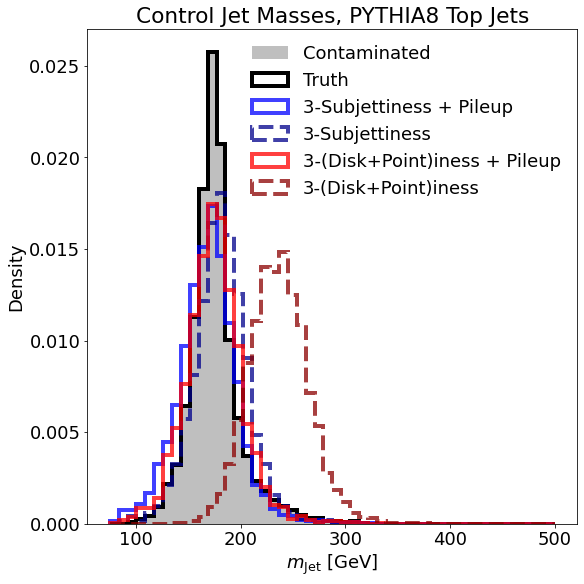

(array([ 71., 326., 596., 736., 976., 998., 797., 349., 119.,  32.]),
 array([0.06139412, 0.1013933 , 0.14139248, 0.18139166, 0.22139084,
        0.26139003, 0.30138921, 0.34138839, 0.38138757, 0.42138675,
        0.46138594]),
 <BarContainer object of 10 artists>)

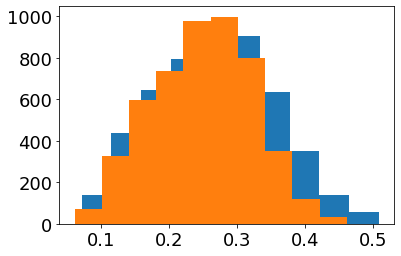

In [6]:
mass_dict = np.load("data/masses.npy", allow_pickle=True)[()]
pileup_dict = np.load("data/pileup_dict.npy", allow_pickle=True)[()]
signal_norms = np.load("data/signal_norms_pu.npy")

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))


bins = 50
lims = [75, 500]

plt.hist(mass_dict["Uncorrected"], bins = bins, range = lims, label = "Contaminated", alpha = 0.25,  histtype="stepfilled", color = "black", lw = 4, density = True)
plt.hist(mass_dict["Truth"], bins = bins, range = lims, label = "Truth", alpha = 1.0, histtype="step", color = "black",  lw = 4, density = True)


plt.hist(mass_dict["3-Subjettiness Plus Pileup"] / (1-pileup_dict["3-Subjettiness Plus Pileup"]) + 10, label = "%s" %("3-Subjettiness + Pileup"), histtype="step", lw = 4, range=lims, bins = bins, color = "blue",  density = True, alpha= 0.75)
plt.hist(mass_dict["3-Subjettiness"] + 10, label = "%s" %("3-Subjettiness"), histtype="step", lw = 4, range=lims, bins = bins, color = "darkblue", ls = "--", density = True, alpha= 0.75)

plt.hist(mass_dict["3-Point-Diskiness Plus Pileup"] / (1 - pileup_dict["3-Point-Diskiness Plus Pileup"]) + 10, label = "%s" %("3-(Disk+Point)iness + Pileup"), histtype="step", lw = 4, range=lims, bins = bins, color = "red",  density = True, alpha= 0.75)
plt.hist(mass_dict["3-Point-Diskiness"] + 10, label = "%s" %("3-(Disk+Point)iness"), histtype="step", lw = 4, range=lims, bins = bins, color = 'darkred', ls = "--", density = True, alpha= 0.75)


for obs in observables:
    print(obs)
    mean  = np.mean(mass_dict[obs])
    std = np.std(mass_dict[obs])



plt.legend(ncol = 1, frameon = False)
plt.xlabel(r"$m_{\rm Jet}$ [GeV]")
plt.ylabel("Density")
plt.title("Control Jet Masses, PYTHIA8 Top Jets")
plt.savefig("Plots/pileup_control.pdf")
plt.show()
plt.close()

plt.hist(pileup_dict["3-Subjettiness Plus Pileup"])
plt.hist(pileup_dict["3-Point-Diskiness Plus Pileup"])



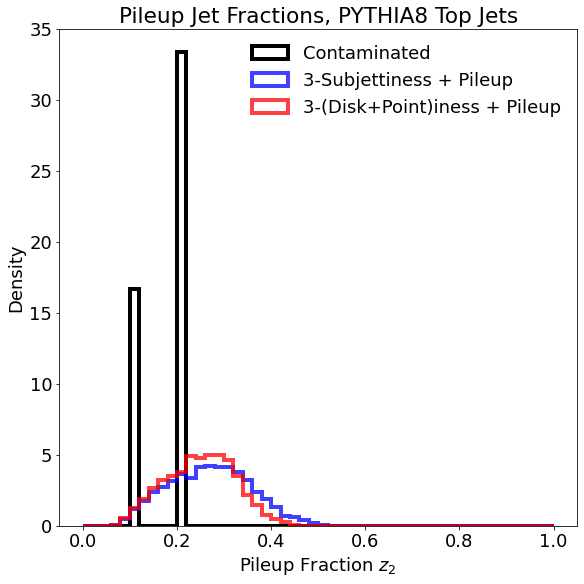

/tmp/ipykernel_172910/1894944253.py:33: RuntimeWarning: invalid value encountered in sqrt
  m_PU2 = np.sqrt(mass_dict["Uncorrected"]**2 - mass_dict["Truth"]**2)
/tmp/ipykernel_172910/1894944253.py:51: RuntimeWarning: invalid value encountered in sqrt
  subjet_m_PU21  = np.sqrt(mass_dict["Uncorrected"]**2 -(mass_dict["3-Subjettiness Plus Pileup"] + 10)**2)
/tmp/ipykernel_172910/1894944253.py:52: RuntimeWarning: invalid value encountered in sqrt
  disk_m_PU21  =  np.sqrt(mass_dict["Uncorrected"]**2   - (mass_dict["3-Point-Diskiness Plus Pileup"] + 10)**2)


89.67438535182299 85.55666583389007


TypeError: '<=' not supported between instances of 'str' and 'float'

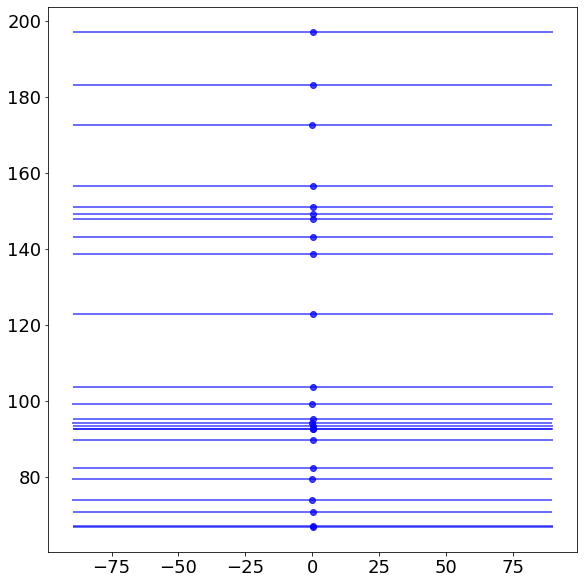

In [7]:
# Energy fractions
lims = [0,1]
_, signal_norm_temp = normalize_events(signal, return_norm= True)
fracs = 1 - (np.array(signal_norm_temp) / np.array(signal_norms1))

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

plt.hist(fracs, bins = bins, histtype="step", label = "Contaminated", range = lims, lw = 4, density = True, color = "black")
plt.hist(pileup_dict["3-Subjettiness Plus Pileup"] , label = "%s" %("3-Subjettiness + Pileup"), histtype="step",  range = lims, lw = 4, bins = bins, density = True, color = "blue", alpha = 0.75)
plt.hist(pileup_dict["3-Point-Diskiness Plus Pileup"] , label = "%s" %("3-(Disk+Point)iness + Pileup"), histtype="step",  range = lims, lw = 4, bins = bins, density = True, color = "red", alpha = 0.75)

plt.legend(frameon = False)
plt.xlabel(r"Pileup Fraction $z_2$")
plt.ylabel("Density")
plt.title("Pileup Jet Fractions, PYTHIA8 Top Jets")
plt.savefig("Plots/pileup_fractions.pdf")
plt.show()
plt.close()





plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

# 2nd plot 
k = 1/3
R = 0.8
m = 175

m_PU2 = np.sqrt(mass_dict["Uncorrected"]**2 - mass_dict["Truth"]**2)



def correction(E, z):

    E_PU = E * z
    E_top = E * (1-z)

    m_pileup2 = k * R**2 * E_PU**2


    m_PU2 = m_pileup2 + 2*2* E_PU * E_top * (1 - np.sqrt(1 - m**2 / (E_top)**2) * np.sqrt(1 - m_pileup2 / (E_PU)**2))
    return m_PU2

subjet_m_PU2  = np.sqrt(correction(signal_norms, 1*pileup_dict["3-Subjettiness Plus Pileup"]))
disk_m_PU2  = np.sqrt( correction(signal_norms, 1*pileup_dict["3-Point-Diskiness Plus Pileup"]))

subjet_m_PU21  = np.sqrt(mass_dict["Uncorrected"]**2 -(mass_dict["3-Subjettiness Plus Pileup"] + 10)**2)
disk_m_PU21  =  np.sqrt(mass_dict["Uncorrected"]**2   - (mass_dict["3-Point-Diskiness Plus Pileup"] + 10)**2)

plot_N = 50
# plt.scatter(m_PU2[:plot_N], subjet_m_PU2[:plot_N], color = "Blue", label = "3-Subjettiness + Pileup", alpha = 0.75)
# plt.scatter(m_PU2[:plot_N], disk_m_PU2[:plot_N], color = "red", label = "3-(Disk+Point)iness + Pileup", alpha = 0.75)


def average_residual(arr):

    return np.sqrt(0.5 * np.nanmean(np.square(m_PU2 - arr)))

subjet_residual = average_residual(subjet_m_PU21)
disk_residual = average_residual(disk_m_PU21)
print(subjet_residual, disk_residual)

plt.errorbar(m_PU2[:plot_N], subjet_m_PU21[:plot_N], yerr = 0, xerr=subjet_residual*np.ones_like(disk_m_PU21[:plot_N]), color = "blue", label = "3-Subjettiness + Pileup, $\hat{\sigma} = %.1f$ GeV" % subjet_residual, alpha = 0.75,fmt='o')
plt.errorbar(m_PU2[:plot_N], disk_m_PU21[:plot_N], yerr = 0, xerr=disk_residual*np.ones_like(disk_m_PU21[:plot_N]), color = "red", label = "3-(Disk+Point)iness + Pileup, $\hat{\sigma} = %.1f$ GeV" % disk_residual, alpha = 0.75,fmt='o')




x = np.linspace(100, 3000, 100)
plt.plot(x, x, ls = "--", alpha = 0.5, color = "grey", lw = 2)

plt.xlim(100, 400)
plt.ylim(100, 400)
plt.xlabel(r"$\sqrt{\Delta m_{\rm PU}^2} = \sqrt{m_{\rm Jet}^2 - \Delta m_{\rm top}^2}$ [GeV]")
plt.ylabel(r"$\sqrt{\Delta \hat{m}_{\rm PU}^2} = \sqrt{m_{\rm Jet}^2 - \Delta \hat{m}_{\rm top}^2(z_2)}$ [GeV]")
plt.title("Pileup Jet Corrections, PYTHIA8 Top Jets")
plt.legend(frameon = False)
plt.savefig("Plots/pileup_biases.pdf")
plt.show()
plt.close()

In [ ]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

# 2nd plot 
k = 1/3
R = 0.8
m = 175

m_PU2 = np.sqrt(signal_pu_mass**2 - signal_mass**2)
_, signal_norms_pre = normalize_events(signal, return_norm=True)
zs_true = (np.array(signal_norms1) - np.array(signal_norms_pre) ) / np.array(signal_norms1)

plt.hist(zs_true)
plt.show()
plt.close()

def correction(E, z):

    E_PU = E * z
    E_top = E * (1-z)

    m_pileup2 = k * R**2 * E_PU**2


    m_PU2 = m_pileup2 + 2*2* E_PU * E_top * (1 - np.sqrt(1 - m**2 / (E_top)**2) * np.sqrt(1 - m_pileup2 / (E_PU)**2))
    return m_PU2

true_m_PU2 = np.sqrt(correction(np.array(signal_norms1), zs_true))



subjet_m_PU2  = np.sqrt(correction(signal_norms, pileup_dict["3-Subjettiness Plus Pileup"]))
disk_m_PU2  = np.sqrt( correction(signal_norms, pileup_dict["3-Point-Diskiness Plus Pileup"]))

# subjet_m_PU2  = mass_dict["3-Subjettiness Plus Pileup"] + 10 + 0*np.sqrt(mass_dict["Uncorrected"]**2 - correction(signal_norms, pileup_dict["3-Subjettiness Plus Pileup"]))
# disk_m_PU2  = mass_dict["3-Point-Diskiness Plus Pileup"] + 10 + 0*np.sqrt(mass_dict["Uncorrected"]**2   - correction(signal_norms, pileup_dict["3-Point-Diskiness Plus Pileup"]))

plot_N = 100
plt.scatter(m_PU2[:plot_N], true_m_PU2[:plot_N], color = "Blue", label = "3-Subjettiness + Pileup", alpha = 0.75)
# plt.scatter(m_PU2[:plot_N], disk_m_PU2[:plot_N], color = "red", label = "3-(Disk+Point)iness + Pileup", alpha = 0.75)

x = np.linspace(50, 3000, 100)
plt.plot(x, x, ls = "--", alpha = 0.5, color = "grey", lw = 2)

plt.xlim(50, 400)
plt.ylim(50, 400)
plt.xlabel(r"$m_{\rm top}$ [GeV]")
plt.ylabel(r"$\hat{m}_{\rm top} = \sqrt{m_{\rm Jet}^2 - \Delta m_{\rm PU}^2(z_2)}$ [GeV]")
plt.title("Pileup Jet Corrections, PYTHIA8 Top Jets")
plt.legend(frameon = False)